# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [3]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
from modules.data_preprocessing import clean_data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [4]:
flight_df = pd.read_csv('/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Mid-Term Project/all_flights_samp.csv')

In [5]:
flight_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-07,UA,UA_CODESHARE,UA,5217,OO,N164SY,5217,11292,DEN,...,627,0.0,0.0,20.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2019-01-26,DL,DL,DL,1926,DL,N952AT,1926,11292,DEN,...,1024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-18,B6,B6,B6,534,B6,N982JB,534,14771,SFO,...,2704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-23,DL,DL,DL,760,DL,N911DE,760,10821,BWI,...,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-04,AS,AS,AS,65,AS,N613AS,65,12523,JNU,...,571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,2019-12-08,DL,DL,DL,1793,DL,N914DU,1793,10397,ATL,...,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199996,2019-12-04,AA,AA_CODESHARE,AA,4745,PT,N624AE,4745,14092,PGV,...,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199997,2019-12-12,AS,AS,AS,839,AS,N562AS,839,14747,SEA,...,2701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1199998,2019-12-09,B6,B6,B6,2578,B6,N589JB,2578,12889,LAS,...,2381,0.0,0.0,52.0,0.0,36.0,NaN,NaN,NaN,NaN


In [6]:
flight_df_sample = flight_df.sample(n=10000)


In [7]:
flight_df_cleaned = clean_data(flight_df_sample)
flight_df_cleaned.head()

/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Mid-Term Project/lighthouse_labs_mid-term_project/src/modules/data_preprocessing.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fl_date'] = pd.to_datetime(df['fl_date'])


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_delay,dup,crs_elapsed_time,flights,distance
554828,2019-06-16,DL,DL,DL,1695,DL,N668DN,1695,14869,SLC,...,13487,MSP,"Minneapolis, MN",2030,2359,63.0,N,149.0,1,991
548638,2019-06-21,DL,DL_CODESHARE,DL,5026,9E,N932XJ,5026,10721,BOS,...,11042,CLE,"Cleveland, OH",1420,1629,56.0,N,129.0,1,563
640036,2019-07-19,AA,AA,AA,10,AA,N110AN,10,12892,LAX,...,12478,JFK,"New York, NY",2145,622,31.0,N,337.0,1,2475
953929,2019-10-04,UA,UA,UA,1964,UA,N39423,1964,12264,IAD,...,14747,SEA,"Seattle, WA",845,1131,-24.0,N,346.0,1,2306
464569,2019-05-23,UA,UA,UA,692,UA,N487UA,692,13198,MCI,...,13930,ORD,"Chicago, IL",1520,1655,4.0,N,95.0,1,403


### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [10]:
# Prepare dataframe with new features and a cleaned trainign and test dataset to run model on. 

# Convert 'fl_date' column to datetime type
#flight_df_cleaned['fl_date'] = pd.to_datetime(flight_df_cleaned['fl_date'])

# Create a 'month' column
flight_df_cleaned['month'] = flight_df_cleaned['fl_date'].dt.month

# Create a 'weekday' column
flight_df_cleaned['weekday'] = flight_df_cleaned['fl_date'].dt.weekday

# Create a 'hour' column based on the CRS departure time
flight_df_cleaned['hour'] = pd.to_datetime(flight_df_cleaned['crs_dep_time'].astype(str).str.zfill(4), format='%H%M').dt.hour

# Create a 'is_holiday' column based on the date based on US holidays in 2019
holidays = ['2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02', '2019-11-28', '2019-12-25']
flight_df_cleaned['is_holiday'] = np.where(flight_df_cleaned['fl_date'].isin(holidays), 1, 0)

# Calculate the average delay for each carrier and add it as a feature
carrier_mean_delay = flight_df_cleaned.groupby('mkt_unique_carrier')['arr_delay'].mean().reset_index()
carrier_mean_delay = carrier_mean_delay.rename(columns={'arr_delay': 'carrier_mean_delay'})
flight_df_cleaned = pd.merge(flight_df_cleaned, carrier_mean_delay, on='mkt_unique_carrier', how='left')

# Calculate the average delay for each airport and add it as a feature
airport_mean_delay = flight_df_cleaned.groupby('origin')['arr_delay'].mean().reset_index()
airport_mean_delay = airport_mean_delay.rename(columns={'arr_delay': 'airport_mean_delay'})
flight_df_cleaned = pd.merge(flight_df_cleaned, airport_mean_delay, on='origin', how='left')

# Calculate the average delay for each month and add it as a feature
month_mean_delay = flight_df_cleaned.groupby('month')['arr_delay'].mean().reset_index()
month_mean_delay = month_mean_delay.rename(columns={'arr_delay': 'month_mean_delay'})
flight_df_cleaned = pd.merge(flight_df_cleaned, month_mean_delay, on='month', how='left')

# Calculate the average delay for each day of the week and add it as a feature
weekday_mean_delay = flight_df_cleaned.groupby('weekday')['arr_delay'].mean().reset_index()
weekday_mean_delay = weekday_mean_delay.rename(columns={'arr_delay': 'weekday_mean_delay'})
flight_df_cleaned = pd.merge(flight_df_cleaned, weekday_mean_delay, on='weekday', how='left')

# Calculate the average delay for each hour of the week and add it as a feature
hour_mean_delay = flight_df_cleaned.groupby('hour')['arr_delay'].mean().reset_index()
hour_mean_delay = hour_mean_delay.rename(columns={'arr_delay': 'hour_mean_delay'})
flight_df_cleaned = pd.merge(flight_df_cleaned, hour_mean_delay, on='hour', how='left')

# One-hot encode categorical variables
flight_df_cleaned = pd.get_dummies(flight_df_cleaned, columns=['mkt_unique_carrier', 'branded_code_share', 'mkt_carrier', 'op_unique_carrier', 'tail_num', 'origin', 'dest'])

# Drop unnecessary columns
cols_to_drop = ['fl_date', 'mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin_city_name', 'dest_airport_id', 'dest_city_name', 'dup', 'crs_elapsed_time', 'distance']
flight_df_cleaned = flight_df_cleaned.drop(cols_to_drop, axis=1)

# Split into train and test sets
train_size = int(len(flight_df_cleaned) * 0.8)
train = flight_df_cleaned[:train_size]
test = flight_df_cleaned[train_size:]

# Save the processed data
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

In [11]:
# Load the train and test datasets
train_df = pd.read_csv('/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Mid-Term Project/lighthouse_labs_mid-term_project/src/modules/train_processed.csv')
test_df = pd.read_csv('/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Mid-Term Project/lighthouse_labs_mid-term_project/src/modules/test_processed.csv')

In [12]:
flight_df_cleaned

,crs_dep_time,crs_arr_time,arr_delay,flights,month,weekday,hour,is_holiday,carrier_mean_delay,airport_mean_delay,...,dest_VEL,dest_VLD,dest_VPS,dest_WRG,dest_WYS,dest_XNA,dest_XWA,dest_YAK,dest_YKM,dest_YUM
0,2030,2359,63.0,1,6,6,20,0,3.216282,1.910082,...,0,0,0,0,0,0,0,0,0,0
1,1420,1629,56.0,1,6,4,14,0,3.216282,7.305221,...,0,0,0,0,0,0,0,0,0,0
2,2145,622,31.0,1,7,4,21,0,7.019090,3.731463,...,0,0,0,0,0,0,0,0,0,0
3,845,1131,-24.0,1,10,4,8,0,11.424185,7.038182,...,0,0,0,0,0,0,0,0,0,0
4,1520,1655,4.0,1,5,3,15,0,11.424185,3.157377,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48865,530,730,-2.0,1,1,1,5,0,3.216282,4.617647,...,0,0,0,0,0,0,0,0,0,0
48866,1635,1700,71.0,1,1,5,16,0,7.019090,22.542857,...,0,0,0,0,0,0,0,0,0,0
48867,1520,1758,8.0,1,6,4,15,0,7.019090,3.717582,...,0,0,0,0,0,0,0,0,0,0
48868,1520,1700,34.0,1,6,4,15,0,11.424185,2.873950,...,0,0,0,0,0,0,0,0,0,0


### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

# import Kmeans from sklearn
from sklearn.cluster import KMeans

#Scalar
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

In [3]:
flights_df = pd.read_csv(r"C:\Users\Dimitri Salavaci\midterm_project\data\flights.csv")
flights_df

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-12-24,WN,WN,WN,2656,WN,N8722L,2656,11278,...,1012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-12-24,WN,WN,WN,826,WN,N913WN,826,11278,...,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-12-24,WN,WN,WN,2454,WN,N766SW,2454,11278,...,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-12-24,WN,WN,WN,1223,WN,N559WN,1223,11278,...,719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-12-24,WN,WN,WN,1285,WN,N205WN,1285,11278,...,719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2018-12-25,DL,DL_CODESHARE,DL,3519,OO,N278SY,3519,10792,...,292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9996,2018-12-25,DL,DL_CODESHARE,DL,3521,OO,N606SK,3521,15376,...,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9997,2018-12-25,DL,DL_CODESHARE,DL,3522,OO,N460SW,3522,14457,...,508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9998,2018-12-25,DL,DL_CODESHARE,DL,3525,OO,N257SY,3525,14570,...,422.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flights_df_updated = flights_df.drop(columns=['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id', 'dest', 
                                        'no_name','cancellation_code', 'longest_add_gtime','total_add_gtime', 'dest_city_name', 'dup', 'mkt_carrier','late_aircraft_delay','security_delay',
                                          'nas_delay','weather_delay','carrier_delay',
                                        'first_dep_time'],axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
flights_sc = scaler.fit_transform(flights_df_updated)

In [10]:
np.any(np.isnan(flights_sc))

True

In [7]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [11]:
clean_dataset(flights_df_updated)

,Unnamed: 0,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,0.0,1410.0,1429.0,19.0,11.0,1440.0,1607.0,4.0,1620.0,1611.0,-9.0,0.0,0.0,190.0,162.0,147.0,1.0,1012.0
1,1.0,1230.0,1227.0,-3.0,10.0,1237.0,1334.0,5.0,1350.0,1339.0,-11.0,0.0,0.0,80.0,72.0,57.0,1.0,356.0
2,2.0,2055.0,2047.0,-8.0,11.0,2058.0,2155.0,4.0,2215.0,2159.0,-16.0,0.0,0.0,80.0,72.0,57.0,1.0,356.0
3,3.0,1855.0,1849.0,-6.0,8.0,1857.0,1948.0,3.0,2020.0,1951.0,-29.0,0.0,0.0,145.0,122.0,111.0,1.0,719.0
4,4.0,1125.0,1121.0,-4.0,9.0,1130.0,1220.0,3.0,1250.0,1223.0,-27.0,0.0,0.0,145.0,122.0,110.0,1.0,719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.0,1550.0,1545.0,-5.0,14.0,1559.0,1651.0,6.0,1719.0,1657.0,-22.0,0.0,0.0,89.0,72.0,52.0,1.0,292.0
9996,9996.0,910.0,900.0,-10.0,23.0,923.0,939.0,28.0,955.0,1007.0,12.0,0.0,0.0,105.0,127.0,76.0,1.0,451.0
9997,9997.0,1747.0,1731.0,-16.0,8.0,1739.0,1908.0,4.0,1936.0,1912.0,-24.0,0.0,0.0,109.0,101.0,89.0,1.0,508.0
9998,9998.0,1330.0,1322.0,-8.0,15.0,1337.0,1548.0,7.0,1556.0,1555.0,-1.0,0.0,0.0,86.0,93.0,71.0,1.0,422.0


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
flights_sc = scaler.fit_transform(flights_df_updated)

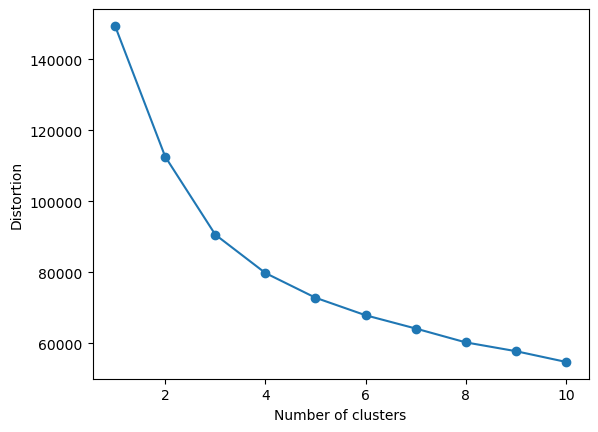

In [13]:
# Plotting Elbow Curve
def plot_distortion_2(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 
    
# elbow rule
plot_distortion_2(flights_sc, max_clusters=10)

In [14]:
# KMeans of dataset
kmeans= KMeans(n_clusters=2, random_state=0)
kmeans.fit(flights_sc)
k_labels = kmeans.labels_
new_columns = kmeans.predict(flights_sc)
clusters = pd.DataFrame(new_columns)

In [15]:
# MinMax Scalar to bring all data onto relative 0-5 scale

minmax = MinMaxScaler(feature_range=(0,5))
minmax_df = minmax.fit_transform(flights_df_updated)
flight_minmax = pd.DataFrame(minmax_df,columns=flights_df_updated.columns.to_list())

In [17]:
# Combine the cluster identifiers with minmax scaled bank behaviour df
new_flight_df = pd.concat([flight_minmax, clusters], axis=1)
new_flight_df.rename(columns={0:'cluster'}, inplace=True)
new_flight_df

,Unnamed: 0,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,cluster
0,0.0000,2.984282,3.023799,0.408654,0.351562,3.051315,3.405428,0.197368,3.432994,3.355565,0.422849,0.0,0.0,1.222386,1.076233,1.055470,0.0,0.990509,1
1,0.0005,2.601954,2.594560,0.232372,0.312500,2.620865,2.826548,0.263158,2.860475,2.788662,0.408012,0.0,0.0,0.412371,0.403587,0.362096,0.0,0.328150,0
2,0.0010,4.354291,4.337017,0.192308,0.351562,4.361747,4.567430,0.197368,4.694656,4.497707,0.370920,0.0,0.0,0.412371,0.403587,0.362096,0.0,0.328150,1
3,0.0015,3.929482,3.916277,0.208333,0.234375,3.935539,4.128499,0.131579,4.281170,4.064193,0.274481,0.0,0.0,0.891016,0.777280,0.778120,0.0,0.694669,1
4,0.0020,2.378929,2.369316,0.224359,0.273438,2.393978,2.584818,0.131579,2.648431,2.546895,0.289318,0.0,0.0,0.891016,0.777280,0.770416,0.0,0.694669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,4.9980,3.281648,3.270293,0.216346,0.468750,3.303647,3.498728,0.328947,3.642918,3.451438,0.326409,0.0,0.0,0.478645,0.403587,0.323575,0.0,0.263530,1
9956,4.9985,1.922260,1.899703,0.176282,0.820312,1.955047,1.988974,1.776316,2.022901,2.096707,0.578635,0.0,0.0,0.596465,0.814649,0.508475,0.0,0.424071,0
9957,4.9990,3.700085,3.665533,0.128205,0.234375,3.685327,4.043681,0.197368,4.103053,3.982910,0.311573,0.0,0.0,0.625920,0.620329,0.608629,0.0,0.481624,1
9958,4.9995,2.814359,2.796430,0.192308,0.507812,2.832909,3.280322,0.394737,3.297286,3.238850,0.482196,0.0,0.0,0.456554,0.560538,0.469954,0.0,0.394790,1


In [18]:
# Genrating radar DF with the mean of each cluster's feature relative to mean of the feature
radar_df = new_flight_df.groupby('cluster').mean().divide(new_flight_df.drop('cluster',axis=1).mean())
radar_df = new_flight_df.groupby('cluster').mean()

In [19]:
categories = radar_df.columns.to_list()
fig = go.Figure()

i=0
for index, series in radar_df.iterrows():
    r = []
    r.append(series.values)
    
    fig.add_trace(go.Scatterpolar(
        r=r[0],
        theta=categories,
        fill='toself',
        name=f'Cluster {i}'))
    i+=1

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 3]
    )),
  showlegend=True)

fig.show()

In [20]:
# Scatter plot of PCA

def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster, 0]
        y = X[y_res == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='black',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.title('Clustering by KMeans - Flights')
    plt.grid()
    plt.show()

In [21]:
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(flights_sc) 
principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal_component_1', 'principal_component_2'])

In [22]:
finalDf = pd.concat([principalDf, new_flight_df[['cluster']]], axis = 1)
finalDf

,principal_component_1,principal_component_2,cluster
0,-0.690470,0.719501,1
1,0.658834,-1.686271,0
2,-3.578763,-1.922473,1
3,-2.641862,-0.484585,1
4,1.124254,-0.278448,0
...,...,...,...
9955,-1.087416,-1.616123,1
9956,2.466350,-0.332998,0
9957,-2.258300,-1.000291,1
9958,-0.218030,-1.186937,1


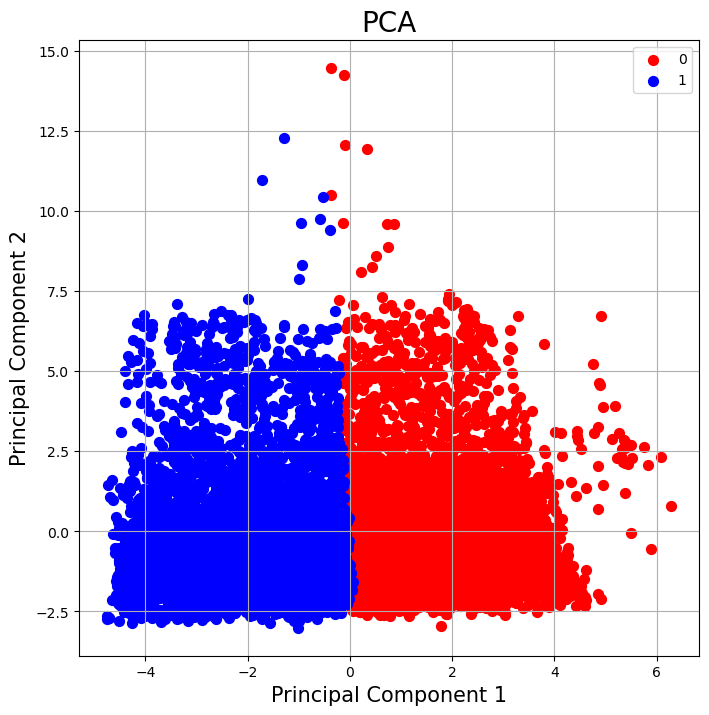

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal_component_1']
               , finalDf.loc[indicesToKeep, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

Linear Regression

In [11]:
# Separate the target variable from the input features
X_train = train_df.drop('arr_delay', axis=1)
y_train = train_df['arr_delay']
X_test = test_df.drop('arr_delay', axis=1)
y_test = test_df['arr_delay']

In [13]:
# Create the scaler object
scaler = StandardScaler()
# Fit the scaler to the training data
scaler.fit(X_train)
# Transform the training and testing data using the scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4.988230136619715e+27


In [19]:
import statsmodels.api as sm

# Fit the model
linear_model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.251
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           1.94e-33
Time:                        21:27:09   Log-Likelihood:            -2.0471e+05
No. Observations:               39130   AIC:                         4.225e+05
Df Residuals:                   32585   BIC:                         4.786e+05
Df Model:                        6544                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
crs_dep_ti

Naive Bayes

In [14]:
# Train the model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 4255.495553511193


Random Forrest

In [16]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest model with 100 trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

Mean squared error: 3135.6407


In [18]:
# Calculate R2
rf_r2 = rf.score(X_test, y_test)

print("Random Forest R2: {:.3f}".format(rf_r2))

Random Forest R2: -0.151


SVM

In [24]:
from sklearn import svm
# using scaled data for SVM

# Create SVM model with a linear kernel
svm_model = svm.SVR(kernel='linear', C=1, epsilon=0.1)

# Fit the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print('Mean squared error:', mse)

# Calculate R2
svm_r2 = svm_model.score(X_test, y_test)

print("SVM R2: {:.3f}".format(svm_r2))

XGBoost

In [23]:
import xgboost as xgb
from xgboost import XGBRegressor

# Fit the model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate R2
xgb_r2 = xgb_model.score(X_test_scaled, y_test)
print("XGBoost R2: {:.3f}".format(xgb_r2))

Mean squared error: 3004.653940666519
XGBoost R2: -0.103


### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.